<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here
df_adult=pd.read_csv('health_insurance.csv')
df_adult.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

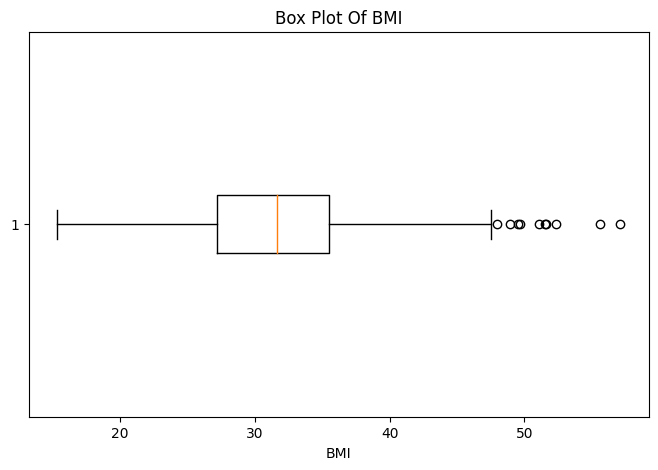

In [3]:
# import your code here
plt.figure(figsize=(8,5))
plt.title('Box Plot Of BMI')
plt.xlabel('BMI')
plt.boxplot(df_adult['bmi'],vert=False)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

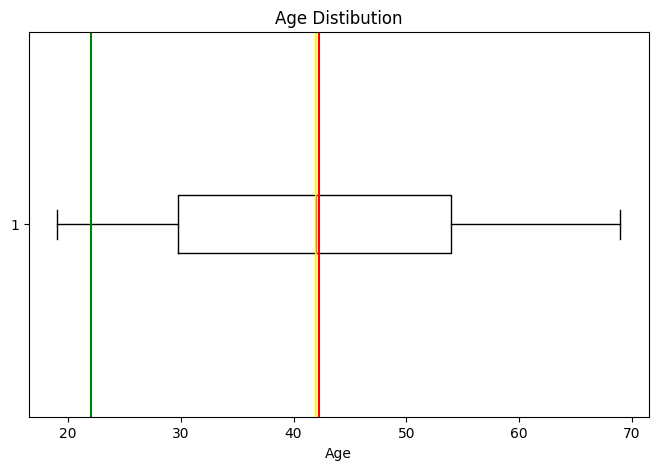

0.04359793424360781
Positively Skewed


In [8]:
# import your code here
plt.figure(figsize=(8,5))
plt.boxplot(df_adult['age'],vert=False)
plt.title('Age Distibution')
plt.xlabel('Age')
plt.axvline(df_adult['age'].mean(),color='red')
plt.axvline(df_adult['age'].median(),color='yellow')
plt.axvline(df_adult['age'].mode().iloc[0],color='green')
plt.show()

skewness=df_adult['age'].skew()
print(skewness)
if skewness>0:
    print('Positively Skewed')
else:
    print('Negatively Skewed')






<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# import your code here
total_folks=len(df_adult)
folks_with_paynment_less_than_25k=len(df_adult[df_adult['medical_cost']<25000])
final_probability=folks_with_paynment_less_than_25k/total_folks
print(final_probability)


0.8523076923076923


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

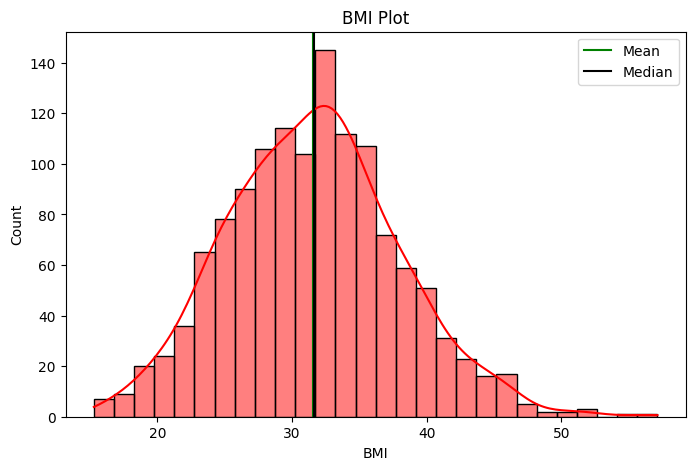

Positively Skewed


In [22]:
# import your code here
plt.figure(figsize=(8,5))
sns.histplot(df_adult['bmi'],kde=True,color='red')
plt.title('BMI Plot')
plt.xlabel('BMI')
plt.axvline(df_adult['bmi'].mean(),label='Mean',color='green')
plt.axvline(df_adult['bmi'].median(),label='Median',color='black')
plt.legend()
plt.show()

skewness=df_adult['bmi'].skew()
if skewness>0:
    print('Positively Skewed')
else:
    print('Negatively Skewed')




<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

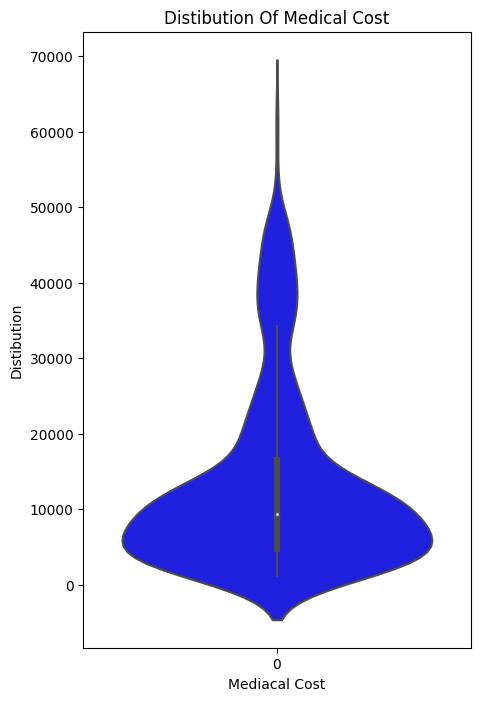

               age          bmi          bp      children  medical_cost
count  1300.000000  1300.000000  1300.000000  1300.000000   1300.000000
mean     42.280769    31.581396   147.774615     1.104615  13243.214691
std      14.024847     6.356487    11.221987     1.208697  12060.371167
min      19.000000    15.290000   120.000000     0.000000   1121.873900
25%      29.750000    27.207500   140.000000     0.000000   4760.155950
50%      42.000000    31.645000   150.000000     1.000000   9388.753650
75%      54.000000    35.488750   156.000000     2.000000  16579.959053
max      69.000000    57.130000   178.000000     5.000000  63770.428010


In [25]:
# import your code here
plt.figure(figsize=(5,8))
sns.violinplot(df_adult['medical_cost'],color='blue')
plt.title('Distibution Of Medical Cost')
plt.xlabel('Mediacal Cost')
plt.ylabel('Distibution')
plt.show()

print(df_adult.describe())

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# import your code here
res=df_adult[(df_adult['age']<30) & (df_adult['medical_cost']>40000)]
print(res)

      age gender    bmi  bp   children     region  smoker  medical_cost
254    26      F  47.54  156         2  northeast  smoker    42112.2356
1009   25      F  55.58  152         1  northeast  smoker    44501.3982
1086   26      M  41.75  152         1  northeast  smoker    40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

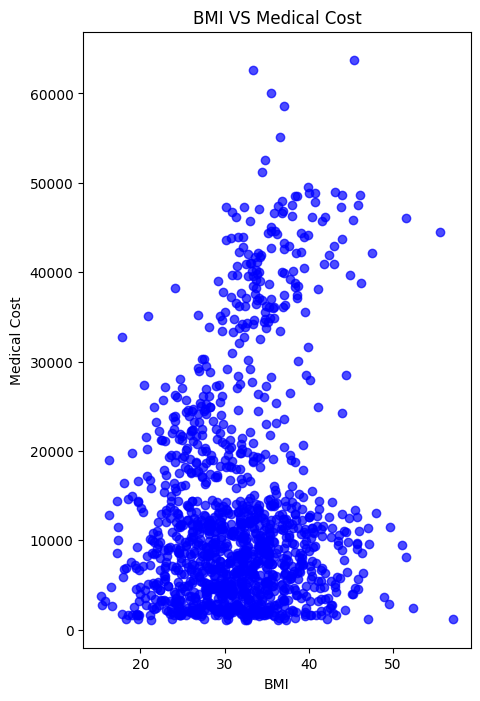

In [30]:
# import your code here
plt.figure(figsize=(5,8))
plt.scatter(df_adult['bmi'],df_adult['medical_cost'],color='blue',alpha=0.7,marker='o')
plt.title('BMI VS Medical Cost')
plt.xlabel('BMI')
plt.ylabel('Medical Cost')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# import your code here
mean_bmi_males=df_adult[df_adult['gender']=='M']['bmi'].mean()
mean_bmi_females=df_adult[df_adult['gender']=='F']['bmi'].mean()
variation_males=(df_adult['bmi']-mean_bmi_males)/(df_adult['bmi'].mean())*100

variation_females=(df_adult['bmi']-mean_bmi_females)/(df_adult['bmi'].mean())*100

print(variation_males)
print(variation_females)




0        1.800182
1       17.220653
2       11.616087
3      -24.148639
4      -10.928831
          ...    
1295    -1.144590
1296    11.362774
1297    11.141124
1298   -20.681408
1299     5.504895
Name: bmi, Length: 1300, dtype: float64
0        0.234349
1       15.654820
2       10.050254
3      -25.714472
4      -12.494664
          ...    
1295    -2.710423
1296     9.796941
1297     9.575291
1298   -22.247241
1299     3.939062
Name: bmi, Length: 1300, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# import your code here
male_count=df_adult[df_adult['gender']=='M'].groupby(['region'])['gender'].count()
print(male_count.sort_values(ascending=False).head(1))



region
southeast    178
Name: gender, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

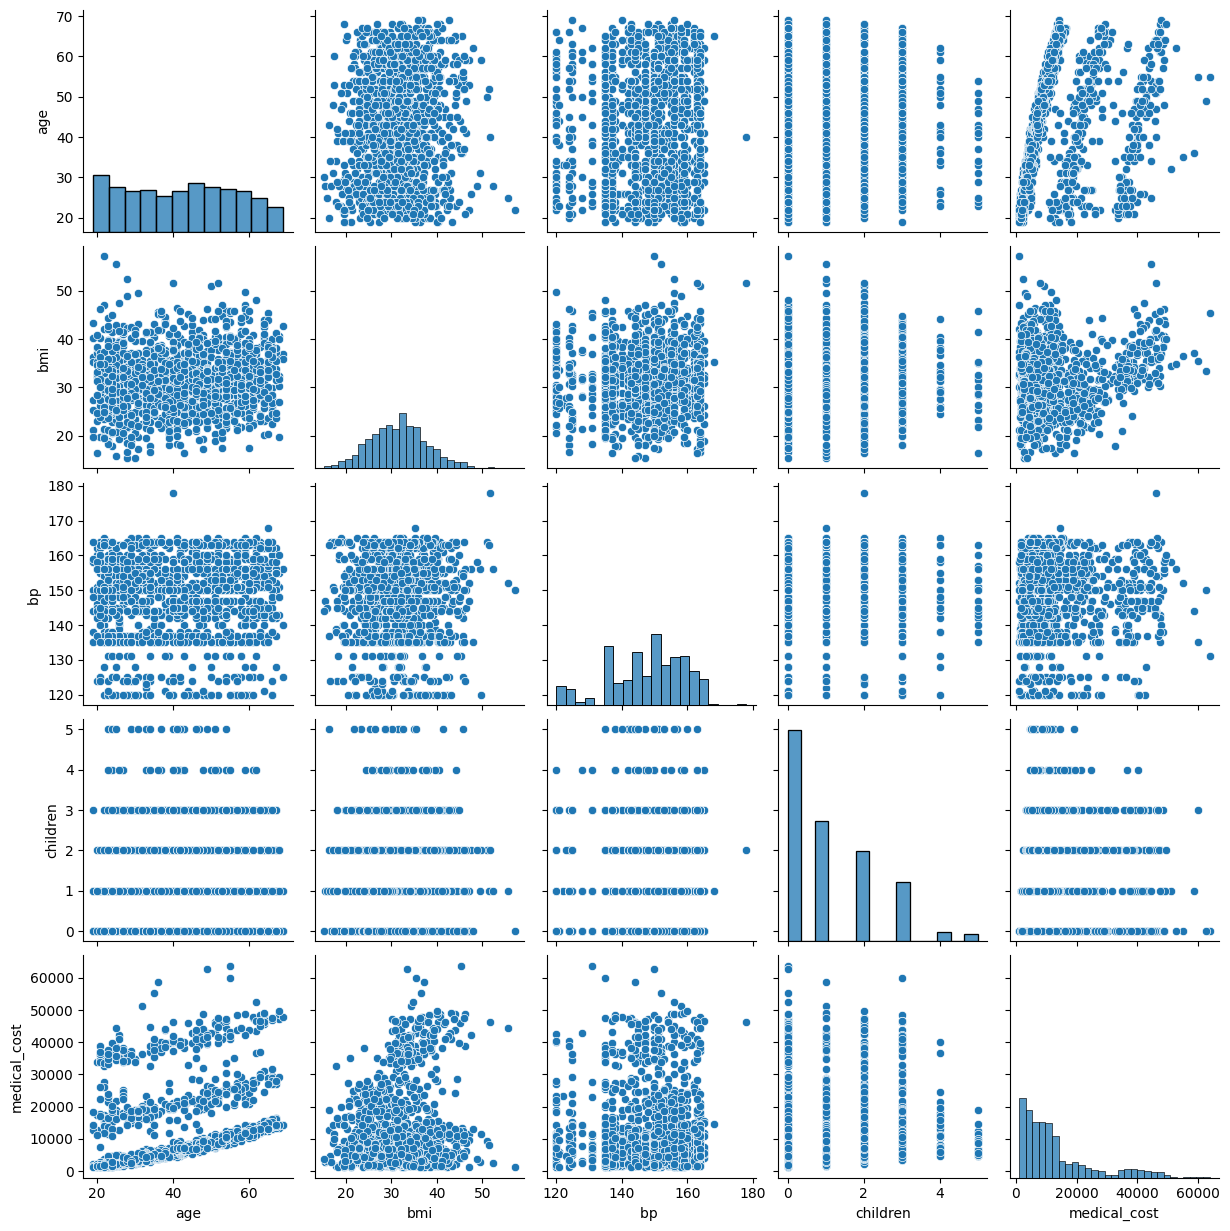

In [42]:
# import your code here
sns.pairplot(df_adult, height=2.5)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# import your code here
df_adult['smoker']=df_adult['smoker'].map({'smoker':1,'non-smoker':0})
val=df_adult['medical_cost'].corr(df_adult['smoker'])
print(val)

if val>0:
    print('proportional affect')
elif val<0:
    print('Inverse effect')
else:
    print('No Effect')

nan
No Effect


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# import your code here


<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# import your code here
dummy_region=pd.get_dummies(df_adult['region'],prefix='region')
pd.concat([df_adult,dummy_region],axis=1)


,age,gender,bmi,bp,children,region,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,M,31.900,157,0,southwest,NaN,16884.92400,False,False,False,True
1,20,F,36.770,160,1,southeast,NaN,1725.55230,False,False,True,False
2,33,F,35.000,145,3,southeast,NaN,4449.46200,False,False,True,False
3,37,F,23.705,153,0,northwest,NaN,21984.47061,False,True,False,False
4,36,F,27.880,156,0,northwest,NaN,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,NaN,10600.54830,False,False,False,True
1296,22,M,34.920,156,0,northeast,NaN,2205.98080,True,False,False,False
1297,21,M,34.850,145,0,southeast,NaN,1629.83350,False,False,True,False
1298,22,M,24.800,150,0,northwest,NaN,2007.94500,False,True,False,False


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# import your code here
df_adult['smoker_label']=pd.factorize(df_adult['smoker'])[0]
df_adult


,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,NaN,16884.92400,-1
1,20,F,36.770,160,1,southeast,NaN,1725.55230,-1
2,33,F,35.000,145,3,southeast,NaN,4449.46200,-1
3,37,F,23.705,153,0,northwest,NaN,21984.47061,-1
4,36,F,27.880,156,0,northwest,NaN,3866.85520,-1
...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,NaN,10600.54830,-1
1296,22,M,34.920,156,0,northeast,NaN,2205.98080,-1
1297,21,M,34.850,145,0,southeast,NaN,1629.83350,-1
1298,22,M,24.800,150,0,northwest,NaN,2007.94500,-1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# import your code here
gender_count=df_adult['gender'].value_counts()
print(gender_count)

gender
F    657
M    643
Name: count, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# import your code here
df_adult['Category_smoker']=df_adult['smoker'].map({'smoker':1,'non-smoker':0})
df_adult

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,Category_smoker
0,23,M,31.900,157,0,southwest,NaN,16884.92400,-1,NaN
1,20,F,36.770,160,1,southeast,NaN,1725.55230,-1,NaN
2,33,F,35.000,145,3,southeast,NaN,4449.46200,-1,NaN
3,37,F,23.705,153,0,northwest,NaN,21984.47061,-1,NaN
4,36,F,27.880,156,0,northwest,NaN,3866.85520,-1,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,NaN,10600.54830,-1,NaN
1296,22,M,34.920,156,0,northeast,NaN,2205.98080,-1,NaN
1297,21,M,34.850,145,0,southeast,NaN,1629.83350,-1,NaN
1298,22,M,24.800,150,0,northwest,NaN,2007.94500,-1,NaN


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# import your code here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_adult['bmi_standardized']=scaler.fit_transform(df_adult[['bmi']])
print(df_adult['bmi_standardized'])

0       0.050142
1       0.816583
2       0.538020
3      -1.239588
4      -0.582526
          ...   
1295   -0.096222
1296    0.525430
1297    0.514413
1298   -1.067257
1299    0.234277
Name: bmi_standardized, Length: 1300, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# import your code here
desired_range=1
current_range=max(df_adult['age'])-min(df_adult['age'])
scales=desired_range/current_range
df_adult['scaled_age']=df_adult['age']*scales

print(df_adult[['age','scaled_age']])

      age  scaled_age
0      23        0.46
1      20        0.40
2      33        0.66
3      37        0.74
4      36        0.72
...   ...         ...
1295   54        1.08
1296   22        0.44
1297   21        0.42
1298   22        0.44
1299   63        1.26

[1300 rows x 2 columns]


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

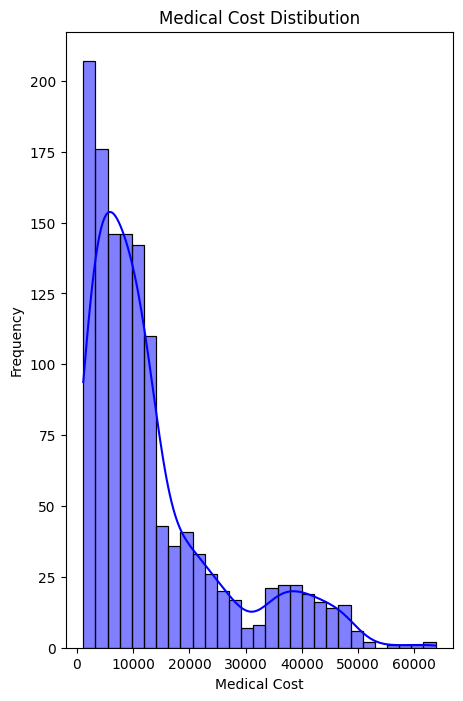

1.5341854555059415


In [62]:
# import your code here
plt.figure(figsize=(5,8))

sns.histplot(df_adult['medical_cost'],kde=True,color='blue')
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')
plt.title('Medical Cost Distibution')
plt.show()

skewness=df_adult['medical_cost'].skew()
print(skewness)


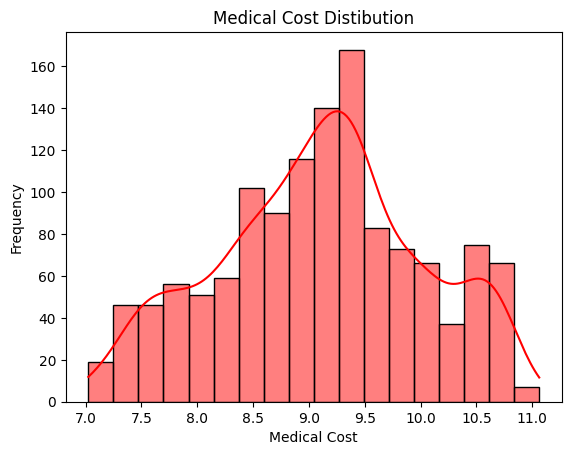

In [63]:
df_adult['without_skew_medical_cost']=np.log1p(df_adult['medical_cost'])
sns.histplot(df_adult['without_skew_medical_cost'],kde=True,color='red')
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')
plt.title('Medical Cost Distibution')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [64]:

df_adult['log_medical_cost'] = np.log1p(df_adult['medical_cost'])


df_adult['reverted_medical_cost'] = np.expm1(df_adult['log_medical_cost'])


comparison = pd.concat([df_adult['medical_cost'], df_adult['reverted_medical_cost']], axis=1)
comparison.columns = ['medical_cost', 'reverted_medical_cost']


print(comparison)

      medical_cost  reverted_medical_cost
0      16884.92400            16884.92400
1       1725.55230             1725.55230
2       4449.46200             4449.46200
3      21984.47061            21984.47061
4       3866.85520             3866.85520
...            ...                    ...
1295   10600.54830            10600.54830
1296    2205.98080             2205.98080
1297    1629.83350             1629.83350
1298    2007.94500             2007.94500
1299   29141.36030            29141.36030

[1300 rows x 2 columns]
